# STAGE 3. E-Commerce Dataset #Bukapedia
Kelompok 1: 
- Fildzah Zhafarina 
- Nabilah Nurul Fikri 
- Wahyuni 
- Sakti Hakim Nasution 
- Ryan Hardi 
- Alifian Darmawan 
- Tiurmauli Rahel Ernita

Sekenario 1 : Split data - Label Encoding - Handling Missing Value

#Install Package

In [ ]:
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 3.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#Import Package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb

import shap

# google drive auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read Dataset


In [ ]:
# Read Dataset
df = pd.read_excel('/content/drive/MyDrive/Kelompok 1/Document /E Commerce Dataset.xlsx','E Comm')
data = df
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3933,53934,0,19.0,Mobile Phone,2,11.0,Debit Card,Female,3.0,6,Fashion,3,Married,6,0,22.0,2.0,2.0,NaN,222.56
1969,51970,0,26.0,Mobile Phone,3,13.0,E wallet,Female,3.0,4,Fashion,1,Married,8,1,18.0,0.0,1.0,NaN,209.34
1727,51728,1,0.0,Computer,1,9.0,COD,Male,NaN,3,Mobile,5,Single,1,0,22.0,0.0,1.0,4.0,131.02
5361,55362,1,1.0,Mobile Phone,1,15.0,Credit Card,Male,4.0,5,Mobile Phone,3,Single,3,1,12.0,2.0,2.0,3.0,164.89
4672,54673,0,1.0,Phone,1,10.0,Credit Card,Male,3.0,5,Mobile Phone,1,Single,2,0,14.0,2.0,2.0,2.0,145.45


In [ ]:
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'SatisfactionScore','Complain']

#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

#Melakukan Split-Data

In [ ]:
#split dataset
x = df.drop(columns=['CustomerID','Churn'])
y = df['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Pre-Processing

##Label_Encoding

In [ ]:
def label_encoding(x_train,
                   x_test):
  ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary',
variables='Gender')
  ordinal_encoder.fit(x_train)
  x_train = ordinal_encoder.transform(x_train)
  x_test = ordinal_encoder.transform(x_test)
  return x_train, x_test

In [ ]:
x_train, x_test = label_encoding(x_train,x_test)

In [ ]:
x_train

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4478,1.0,Mobile Phone,1,12.0,Debit Card,0,3.0,4,Mobile Phone,4,Single,3,1,13.0,1.0,2.0,3.0,149.78
3685,17.0,Mobile Phone,1,13.0,Credit Card,0,4.0,5,Laptop & Accessory,3,Single,3,1,15.0,2.0,2.0,9.0,165.81
731,0.0,Phone,1,9.0,Debit Card,1,NaN,4,Mobile,3,Single,2,0,12.0,0.0,1.0,2.0,130.33
291,NaN,Computer,1,8.0,Debit Card,1,2.0,3,Mobile Phone,2,Divorced,2,1,23.0,1.0,1.0,0.0,117.02
184,4.0,Phone,1,11.0,COD,1,2.0,3,Mobile Phone,2,Divorced,1,1,12.0,0.0,1.0,3.0,148.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,Phone,1,27.0,Debit Card,1,4.0,4,Laptop & Accessory,3,Single,2,0,15.0,2.0,2.0,3.0,147.72
5191,10.0,Mobile Phone,3,16.0,E wallet,1,3.0,4,Fashion,1,Married,6,0,12.0,5.0,5.0,NaN,225.96
5226,7.0,Mobile Phone,1,11.0,Credit Card,0,3.0,5,Mobile Phone,4,Married,10,0,12.0,2.0,2.0,3.0,163.38
5390,1.0,Mobile Phone,1,36.0,Credit Card,1,4.0,4,Mobile Phone,5,Married,3,0,14.0,2.0,2.0,3.0,164.07


In [ ]:
x_test

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4331,1.0,Computer,3,7.0,COD,0,4.0,6,Mobile Phone,5,Single,2,0,22.0,2.0,2.0,1.0,148.25
1988,15.0,Mobile Phone,1,9.0,Debit Card,0,3.0,1,Laptop & Accessory,1,Married,3,1,13.0,1.0,1.0,3.0,152.31
3443,13.0,Computer,1,29.0,Credit Card,0,3.0,4,Fashion,5,Single,3,1,14.0,2.0,NaN,9.0,233.80
4559,5.0,Phone,1,7.0,Debit Card,1,4.0,5,Mobile Phone,5,Married,3,0,13.0,4.0,4.0,3.0,147.18
4898,13.0,Mobile Phone,1,7.0,Debit Card,0,4.0,5,Grocery,1,Married,3,0,17.0,10.0,NaN,9.0,252.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,16.0,Computer,1,16.0,Credit Card,0,4.0,4,Mobile Phone,1,Single,3,0,14.0,5.0,6.0,9.0,161.73
833,7.0,Mobile Phone,1,15.0,Debit Card,1,2.0,3,Fashion,2,Married,1,0,11.0,1.0,1.0,6.0,185.00
4441,16.0,Mobile Phone,3,7.0,Debit Card,1,2.0,4,Laptop & Accessory,3,Married,3,0,26.0,7.0,12.0,7.0,174.07
4490,17.0,Computer,1,17.0,Debit Card,0,3.0,5,Laptop & Accessory,3,Married,3,0,12.0,2.0,2.0,1.0,177.57


##Melakukan One Hot Encoding

In [ ]:
def label_ohe(x_train, 
              x_test):
  cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
  ohe_encoder = OneHotEncoder(variables=cat_features)
  ohe_encoder.fit(x_train)
  x_train = ohe_encoder.transform(x_train)
  x_test = ohe_encoder.transform(x_test)

  return x_train, x_test

In [ ]:
x_train , x_test=label_ohe(x_train, x_test)

In [ ]:
#hasil lable endcoding
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4478,1.0,1,12.0,0,3.0,4,4,3,1,13.0,...,0,1,0,0,0,0,0,1,0,0
3685,17.0,1,13.0,0,4.0,5,3,3,1,15.0,...,0,0,1,0,0,0,0,1,0,0
731,0.0,1,9.0,1,NaN,4,3,2,0,12.0,...,0,0,0,1,0,0,0,1,0,0
291,NaN,1,8.0,1,2.0,3,2,2,1,23.0,...,0,1,0,0,0,0,0,0,1,0
184,4.0,1,11.0,1,2.0,3,2,1,1,12.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,1,4.0,4,3,2,0,15.0,...,0,0,1,0,0,0,0,1,0,0
5191,10.0,3,16.0,1,3.0,4,1,6,0,12.0,...,0,0,0,0,1,0,0,0,0,1
5226,7.0,1,11.0,0,3.0,5,4,10,0,12.0,...,0,1,0,0,0,0,0,0,0,1
5390,1.0,1,36.0,1,4.0,4,5,3,0,14.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
x_test

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4331,1.0,3,7.0,0,4.0,6,5,2,0,22.0,...,0,1,0,0,0,0,0,1,0,0
1988,15.0,1,9.0,0,3.0,1,1,3,1,13.0,...,0,0,1,0,0,0,0,0,0,1
3443,13.0,1,29.0,0,3.0,4,5,3,1,14.0,...,0,0,0,0,1,0,0,1,0,0
4559,5.0,1,7.0,1,4.0,5,5,3,0,13.0,...,0,1,0,0,0,0,0,0,0,1
4898,13.0,1,7.0,0,4.0,5,1,3,0,17.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,16.0,1,16.0,0,4.0,4,1,3,0,14.0,...,0,1,0,0,0,0,0,1,0,0
833,7.0,1,15.0,1,2.0,3,2,1,0,11.0,...,0,0,0,0,1,0,0,0,0,1
4441,16.0,3,7.0,1,2.0,4,3,3,0,26.0,...,0,0,1,0,0,0,0,0,0,1
4490,17.0,1,17.0,0,3.0,5,3,3,0,12.0,...,0,0,1,0,0,0,0,0,0,1


## Handling Missing Value dan Imputasi

In [ ]:
cat_features = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
cont_features = ['HourSpendOnApp']

In [ ]:
def imputation (x_train, 
                x_test,
                cont_features,
                cat_features,
                cont_strategy = 'median',
                cat_strategy = 'most_frequent'
                ):

#initializa object imputer
  imputerCat = SimpleImputer(missing_values=np.nan, strategy= cat_strategy)
  imputerCont = SimpleImputer(missing_values=np.nan, strategy= cont_strategy)

#fit to data train
  imputerCont.fit(x_train[cont_features])
  imputerCat.fit(x_train[cat_features])

#transfrom to data train
  x_train[cont_features] = imputerCont.transform(x_train[cont_features])
  x_train[cat_features] = imputerCat.transform(x_train[cat_features])
  x_test[cont_features] = imputerCont.transform(x_test[cont_features])
  x_test[cat_features] = imputerCat.transform(x_test[cat_features])

  return x_train, x_test

In [ ]:
x_train , x_test = imputation(x_train, x_test,cont_features, cat_features)

In [ ]:
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4478,1.0,1,12.0,0,3.0,4,4,3,1,13.0,...,0,1,0,0,0,0,0,1,0,0
3685,17.0,1,13.0,0,4.0,5,3,3,1,15.0,...,0,0,1,0,0,0,0,1,0,0
731,0.0,1,9.0,1,3.0,4,3,2,0,12.0,...,0,0,0,1,0,0,0,1,0,0
291,1.0,1,8.0,1,2.0,3,2,2,1,23.0,...,0,1,0,0,0,0,0,0,1,0
184,4.0,1,11.0,1,2.0,3,2,1,1,12.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,1,4.0,4,3,2,0,15.0,...,0,0,1,0,0,0,0,1,0,0
5191,10.0,3,16.0,1,3.0,4,1,6,0,12.0,...,0,0,0,0,1,0,0,0,0,1
5226,7.0,1,11.0,0,3.0,5,4,10,0,12.0,...,0,1,0,0,0,0,0,0,0,1
5390,1.0,1,36.0,1,4.0,4,5,3,0,14.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
x_test

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4331,1.0,3,7.0,0,4.0,6,5,2,0,22.0,...,0,1,0,0,0,0,0,1,0,0
1988,15.0,1,9.0,0,3.0,1,1,3,1,13.0,...,0,0,1,0,0,0,0,0,0,1
3443,13.0,1,29.0,0,3.0,4,5,3,1,14.0,...,0,0,0,0,1,0,0,1,0,0
4559,5.0,1,7.0,1,4.0,5,5,3,0,13.0,...,0,1,0,0,0,0,0,0,0,1
4898,13.0,1,7.0,0,4.0,5,1,3,0,17.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,16.0,1,16.0,0,4.0,4,1,3,0,14.0,...,0,1,0,0,0,0,0,1,0,0
833,7.0,1,15.0,1,2.0,3,2,1,0,11.0,...,0,0,0,0,1,0,0,0,0,1
4441,16.0,3,7.0,1,2.0,4,3,3,0,26.0,...,0,0,1,0,0,0,0,0,0,1
4490,17.0,1,17.0,0,3.0,5,3,3,0,12.0,...,0,0,1,0,0,0,0,0,0,1


#Prediction dan Test Model

## Function Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def get_metrics(y_pred, y_act, model_name):
  recall =  recall_score(y_act, y_pred)
  precision = precision_score(y_act, y_pred)
  roc_auc = roc_auc_score(y_act, y_pred)
  f1 = f1_score(y_act, y_pred)
  accuracy = balanced_accuracy_score(y_act, y_pred)

  metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
  
  return metrics_result


def prediction(x_train, y_train, x_test, y_test, clf, model_name='decision tree'):
  
  clf = clf
  clf.fit(x_train, y_train)
  y_test_pred = clf.predict(x_test)
  y_train_pred = clf.predict(x_train)


  result = dict()
  test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
  train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

  result['test'] = test_result
  result['train'] = train_result
  result['y_test'] = y_test
  result['y_test_pred'] = y_test_pred
  result['y_train'] = y_train
  result['y_train_pred'] = y_train_pred
  result['clf'] = clf
  result['x_train'] = x_train
  result['x_test'] = x_test

  del clf

  return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


## Pred evaluation

In [ ]:
model_1_result = prediction(x_train, y_train, x_test, y_test, tree.DecisionTreeClassifier(), model_name='decision tree')
model_2_result = prediction(x_train, y_train, x_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')
model_3_result = prediction(x_train, y_train, x_test, y_test, cb.CatBoostClassifier(random_state=42, logging_level='Silent'), model_name='catboost')
model_4_result = prediction(x_train, y_train, x_test, y_test, LogisticRegression(), model_name='logistic regression')
model_5_result = prediction(x_train, y_train, x_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')
model_6_result = prediction(x_train, y_train, x_test, y_test, KNeighborsClassifier(), model_name='kNN')
model_7_result = prediction(x_train, y_train, x_test, y_test, AdaBoostClassifier(random_state=42), model_name='adaboost')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# Result Modeling

In [ ]:
pd.DataFrame([model_1_result['train'], 
              model_2_result['train'], 
              model_3_result['train'], 
              model_4_result['train'], 
              model_5_result['train'],
              model_6_result['train'], 
              model_7_result['train']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,1.000000,1.000000,1.000000,1.000000,1.000000
1,xgboost,0.665793,0.886562,0.824209,0.760479,0.824209
2,catboost,0.959371,0.997275,0.979418,0.977956,0.979418
3,logistic regression,0.519004,0.722628,0.739187,0.604119,0.739187
4,random forest,1.000000,1.000000,1.000000,1.000000,1.000000
5,kNN,0.557012,0.792910,0.763670,0.654349,0.763670
6,adaboost,0.589777,0.756303,0.775509,0.662739,0.775509


In [ ]:
pd.DataFrame([model_1_result['test'], 
              model_2_result['test'], 
              model_3_result['test'], 
              model_4_result['test'], 
              model_5_result['test'],
              model_6_result['test'], 
              model_7_result['test']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,0.854054,0.923977,0.920119,0.887640,0.920119
1,xgboost,0.627027,0.852941,0.802887,0.722741,0.802887
2,catboost,0.816216,0.974194,0.905983,0.888235,0.905983
3,logistic regression,0.551351,0.796875,0.761861,0.651757,0.761861
4,random forest,0.827027,1.000000,0.913514,0.905325,0.913514
5,kNN,0.400000,0.627119,0.676621,0.488449,0.676621
6,adaboost,0.616216,0.808511,0.793762,0.699387,0.793762


#Hyperparameter Tuning

## Hyperparameter LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score:' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.8847690941385435
Test score:0.9031971580817052


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
logres_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='logistic regression_hyperparam')

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

In [ ]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score: ' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.2699868938401048
Test score: 0.24864864864864866


##Hyperparameter KKN

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score:' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.9003108348134992
Test score:0.8623445825932504


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
kkn_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='kNN_hyperparam')

In [ ]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 28
Best p: 1
Best algorithm: kd_tree


In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score: ' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.788546255506608
Test score: 0.8113207547169812


## Hyperparameter DecisionTreeClassifier

In [ ]:
model = tree.DecisionTreeClassifier() 
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score:' + str(model.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.9742451154529307


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = tree.DecisionTreeClassifier()
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(x_train, y_train)

# Predict & Evaluation
dt_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='decision tree_hyperparam')
dt_hyper

{'clf': RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                    param_distributions={'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                       27, 31, 34, 38, 42, 46,
                                                       49, 53, 57, 61, 64, 68,
                                                       72, 76, 79, 83, 87, 91,
                                                       94, 98, 102, 106, 110],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 4, 10, 20,
                                                              50],
                                         'min_samples_split': [2, 5, 10, 100]},
                    random_state=42, scoring='recall'),
 'test': {'accuracy': 0.846798977510986,
  'f1': 0.7627118644067796,
  'model_name': 'decision tree_hyperparam',
  'precision': 0.7988165680473372,
  'recall': 0.7297297297297297

In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(x_train, y_train)))
print('Test score: ' + str(model.score(x_test, y_test)))

Train score: 0.8060288335517694
Test score: 0.7297297297297297


## Hyperparameter Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print('Train score: ' + str(rf.score(x_train, y_train))) #accuracy
print('Test score: ' + str(rf.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.9715808170515098


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
rf_hyper = prediction(x_train, y_train, x_test, y_test, rf_tuned, model_name='random forest_hyperparam')
rf_hyper

{'clf': RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                    param_distributions={'bootstrap': [True],
                                         'criterion': ['gini', 'entropy'],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': [1, 3, 5, 7, 10],
                                         'min_samples_split': [2, 4, 6, 8, 10],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000, 1100, 1200,
                                                          1300, 1400, 1500, 1600,
   

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [ ]:
print('Train score: ' + str(rf_tuned.score(x_train, y_train))) #accuracy
print('Test score: ' + str(rf_tuned.score(x_test, y_test))) #accuracy

Train score: 0.9960681520314548
Test score: 0.7945945945945946


## Hyperparameter AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
print('Train score: ' + str(ab.score(x_train, y_train))) #accuracy
print('Test score: ' + str(ab.score(x_test, y_test))) #accuracy

Train score: 0.8983126110124334
Test score: 0.9129662522202486


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
ad_hyper = prediction(x_train, y_train, x_test, y_test, ab_tuned, model_name='adaboost_hyperparam')

In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


In [ ]:
print('Train score: ' + str(ab_tuned.score(x_train, y_train))) #accuracy
print('Test score: ' + str(ab_tuned.score(x_test, y_test))) #accuracy

Train score: 0.5950196592398427
Test score: 0.6216216216216216


## Hyperparameter CatBoost

In [ ]:
cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
cat.fit(x_train,y_train)

In [ ]:
print('Train score: ' + str(cat.score(x_train, y_train))) #accuracy
print('Test score: ' + str(cat.score(x_test, y_test))) #accuracy

Train score: 0.9926731793960923
Test score: 0.9662522202486679


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )

# Init model
cat = cb.CatBoostClassifier(random_state=42,logging_level='Silent')
cat_tuned = RandomizedSearchCV(cat, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
cat_hyper = prediction(x_train, y_train, x_test, y_test, cat_tuned, model_name='cat boost_hyperparam')

In [ ]:
show_best_hyperparameter(cat_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1000
Best learning_rate: 0.08436842105263158


In [ ]:
print('Train score: ' + str(cat_tuned.score(x_train, y_train))) #accuracy
print('Test score: ' + str(cat_tuned.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score: 0.9351351351351351


## Hyperparameter XGBOOST

In [ ]:
xg = xgb.XGBClassifier(random_state=42)
xg.fit(x_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
print('Train score: ' + str(xg.score(x_train, y_train))) #accuracy
print('Test score: ' + str(xg.score(x_test, y_test))) #accuracy

Train score: 0.9289520426287744
Test score: 0.9209591474245116


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
xg_hyper = prediction(x_train, y_train, x_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


In [ ]:
print('Train score: ' + str(xg_tuned.score(x_train, y_train))) #accuracy
print('Test score: ' + str(xg_tuned.score(x_test, y_test))) #accuracy

Train score: 0.9986893840104849
Test score: 0.8972972972972973


# Result Hyperparameter modeling

In [ ]:
pd.DataFrame([logres_hyper['train'], 
              kkn_hyper['train'], 
              dt_hyper['train'], 
              rf_hyper['train'], 
              ad_hyper['train'],
              cat_hyper['train'],
              xg_hyper['train']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,logistic regression_hyperparam,0.269987,0.792308,0.627776,0.402737,0.627776
1,kNN_hyperparam,0.234600,0.788546,0.610885,0.361616,0.610885
2,decision tree_hyperparam,0.806029,0.886167,0.892456,0.844200,0.892456
3,random forest_hyperparam,0.996068,1.000000,0.998034,0.998030,0.998034
4,adaboost_hyperparam,0.595020,0.769492,0.779333,0.671101,0.779333
5,cat boost_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
6,xgboost_hyperparam,0.998689,1.000000,0.999345,0.999344,0.999345


In [ ]:
pd.DataFrame([logres_hyper['test'], 
              kkn_hyper['test'], 
              dt_hyper['test'], 
              rf_hyper['test'], 
              ad_hyper['test'],
              cat_hyper['test'],
              xg_hyper['test']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,logistic regression_hyperparam,0.248649,0.836364,0.619542,0.383333,0.619542
1,kNN_hyperparam,0.232432,0.811321,0.610903,0.361345,0.610903
2,decision tree_hyperparam,0.729730,0.798817,0.846799,0.762712,0.846799
3,random forest_hyperparam,0.794595,1.000000,0.897297,0.885542,0.897297
4,adaboost_hyperparam,0.621622,0.827338,0.798058,0.709877,0.798058
5,cat boost_hyperparam,0.935135,0.994253,0.967036,0.963788,0.967036
6,xgboost_hyperparam,0.897297,0.988095,0.947586,0.940510,0.947586


#Feature Importance

In [ ]:
# model interpretation DecisionTree

explainer = shap.Explainer(model_1_result['clf'].predict, model_1_result['x_test'])
shap_values = explainer(model_1_result['x_test'])


Permutation explainer: 1127it [00:44, 22.39it/s]                          


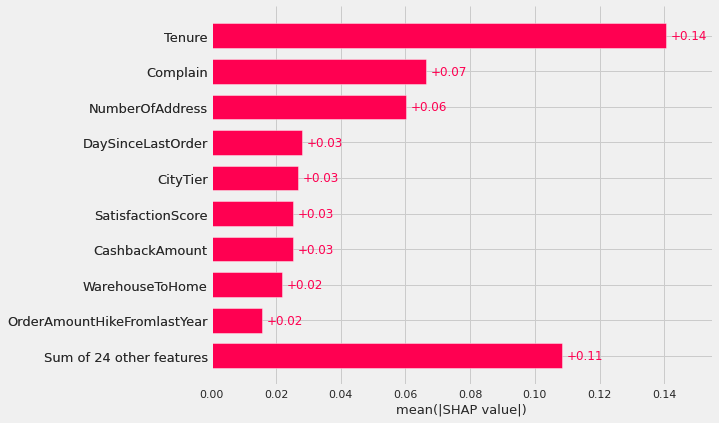

In [ ]:
shap.plots.bar(shap_values)

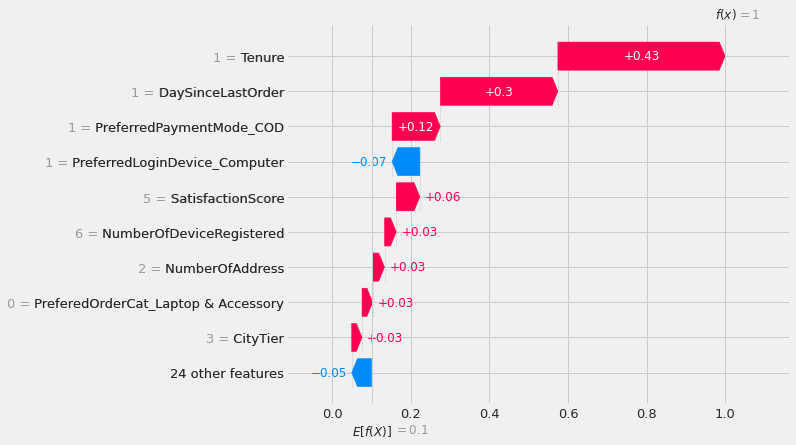

In [ ]:
# sample data to check the label

shap.plots.waterfall(shap_values[0])

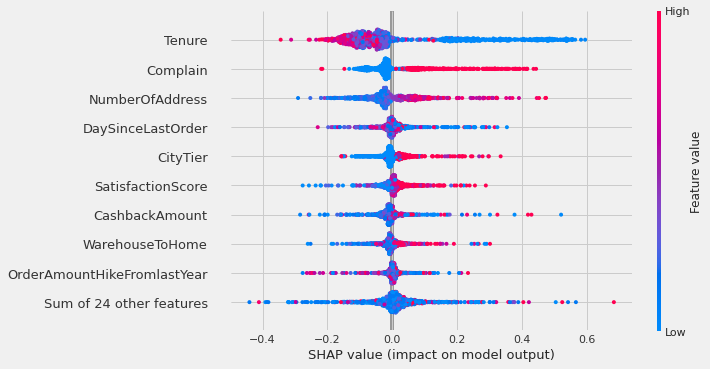

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
# model interpretation CatBoost

explainer = shap.Explainer(model_3_result['clf'].predict, model_3_result['x_test'])
shap_values = explainer(model_3_result['x_test'])

Permutation explainer: 1127it [01:54,  9.01it/s]


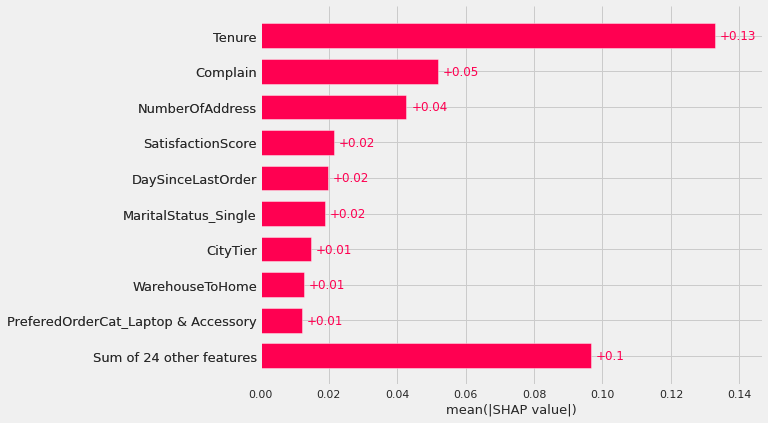

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
# model interpretation RandomForest

explainer = shap.Explainer(model_5_result['clf'].predict, model_5_result['x_test'])
shap_values = explainer(model_5_result['x_test'])

Permutation explainer: 1127it [08:54,  2.08it/s]


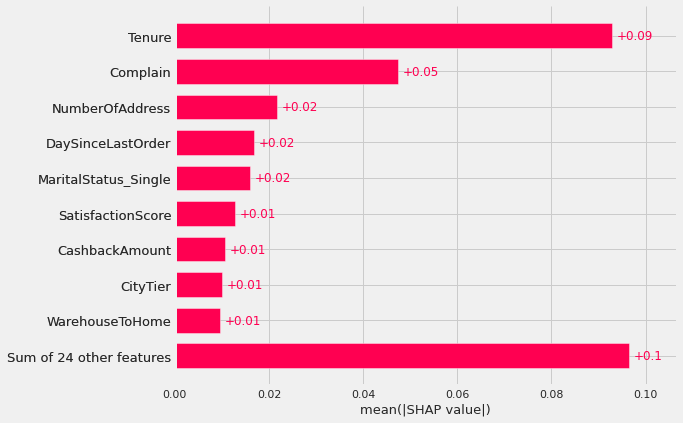

In [ ]:
shap.plots.bar(shap_values)

## Confusion Matrix

In [ ]:
# RandomForest
y_pred = rf_tuned.predict(x_test)
y_pred_train = rf_tuned.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[941   0]
 [ 38 147]]


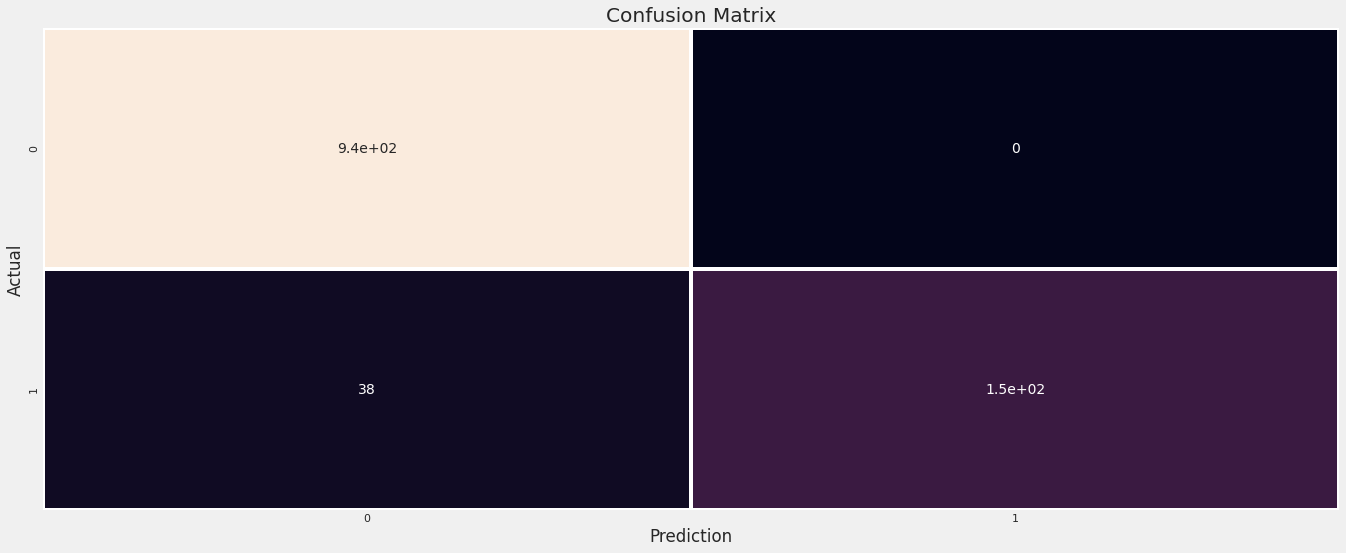

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [ ]:
cf_matrix1 = confusion_matrix(y_train, y_pred_train)

print(cf_matrix1)

[[3741    0]
 [   3  760]]


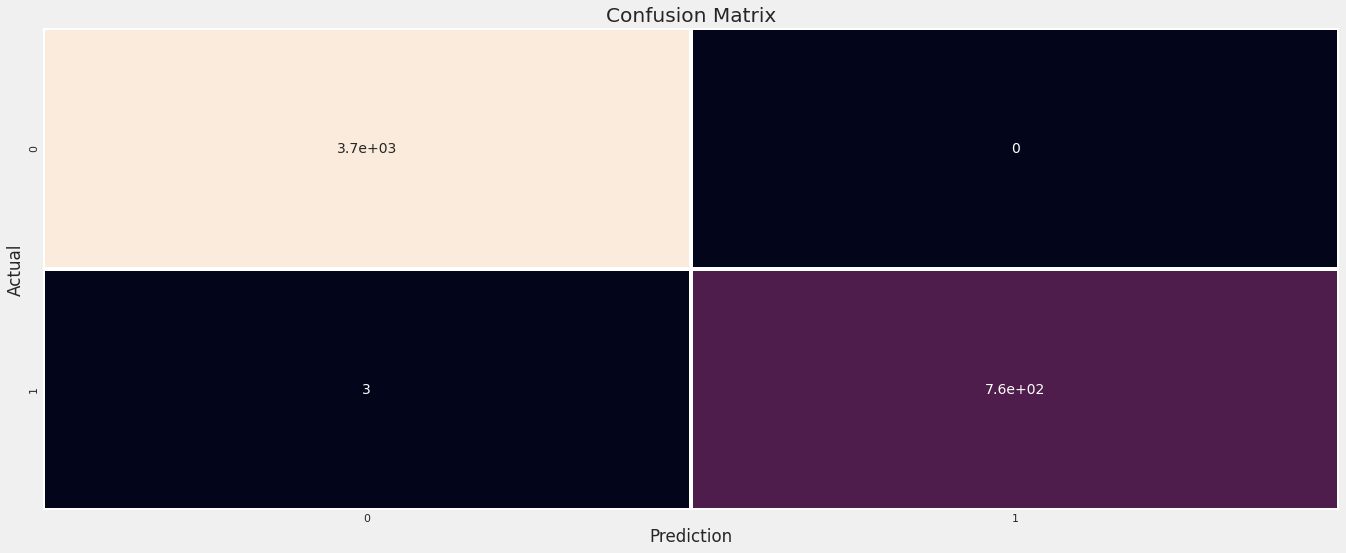

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [ ]:
# CatBoost
y_pred = cat_tuned.predict(x_test)
y_pred_train = cat_tuned.predict(x_train)

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[940   1]
 [ 12 173]]


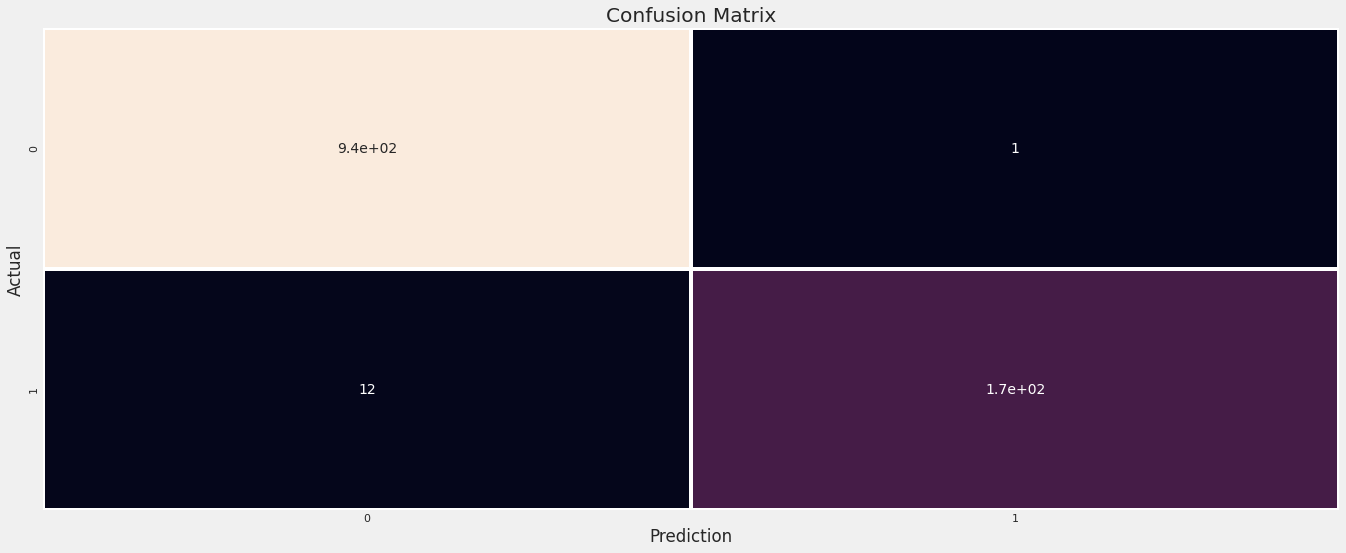

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [ ]:
cf_matrix1 = confusion_matrix(y_train, y_pred_train)

print(cf_matrix1)

[[3741    0]
 [   0  763]]


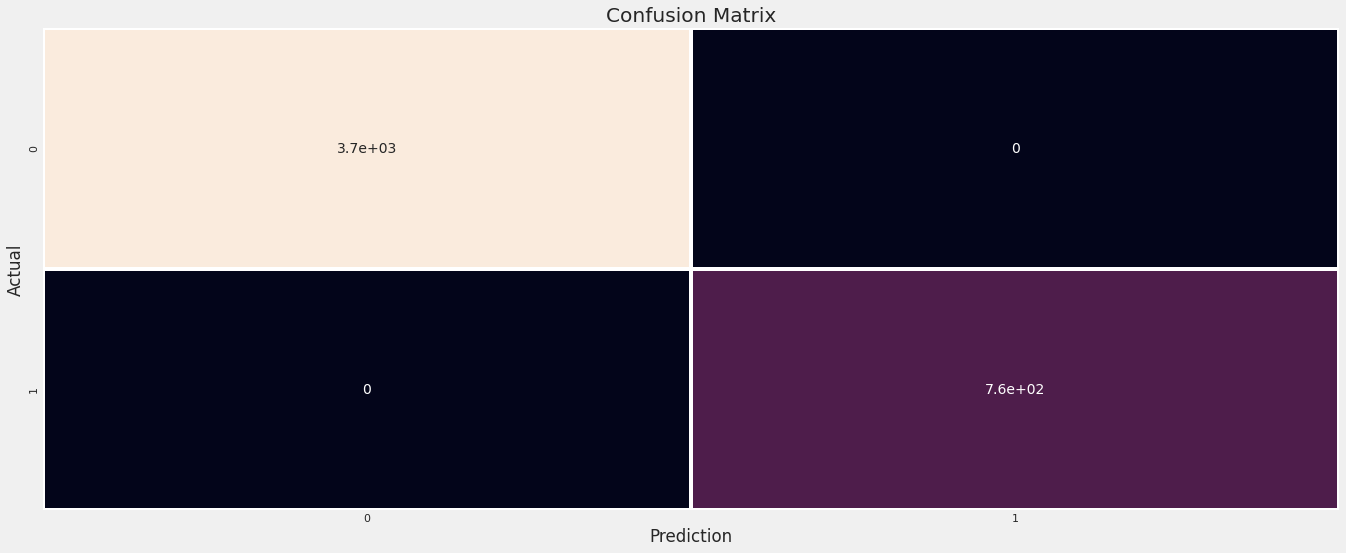

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

## Top Feature Insight

Kelompok kami memutuskan untuk memilih model RandomForest sebagai predicted model. Jika dilihat dari feature importance score dari model RandomForest, beberapa feature yang menjadi important predictor adalah feature Tenure, Complain, NumberOfAddress, DaySinceLastOrder, dan MaritalStatus_Single

Berikut merupakan beberapa insight dari feature-feature tersebut:

### 1. Tenure

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

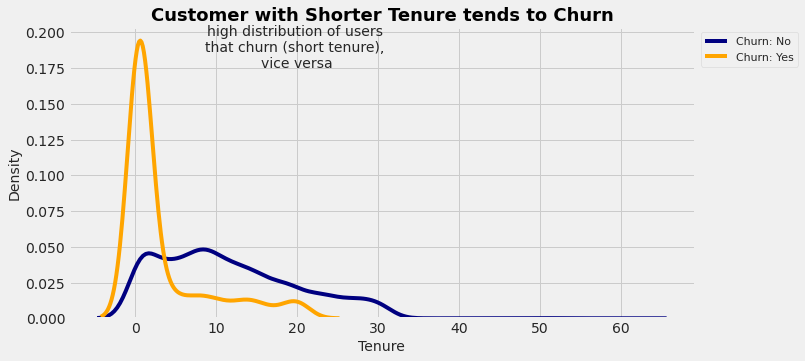

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('high distribution of users \nthat churn (short tenure), \nvice versa', 
            xy=(2, 0.2), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

### 2. Complain

In [ ]:
group_by_complain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

group_by_complain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain3 = group_by_complain.merge(group_by_complain2, how='left',
              on='PreferedOrderCat')

group_by_complain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
group_by_complain3['Ratio'] = (group_by_complain3['Num_Customer'] / group_by_complain3['AllCustomer'] * 100.0).round(2)
group_by_complain3

,PreferedOrderCat,Complain,Num_Customer,AllCustomer,Ratio
0,Fashion,Not Complain,584,826,70.70
1,Fashion,Complain,242,826,29.30
2,Grocery,Not Complain,284,410,69.27
3,Grocery,Complain,126,410,30.73
4,Laptop & Accessory,Not Complain,1492,2050,72.78
5,Laptop & Accessory,Complain,558,2050,27.22
6,Mobile,Not Complain,573,809,70.83
7,Mobile,Complain,236,809,29.17
8,Mobile Phone,Not Complain,897,1271,70.57
9,Mobile Phone,Complain,374,1271,29.43


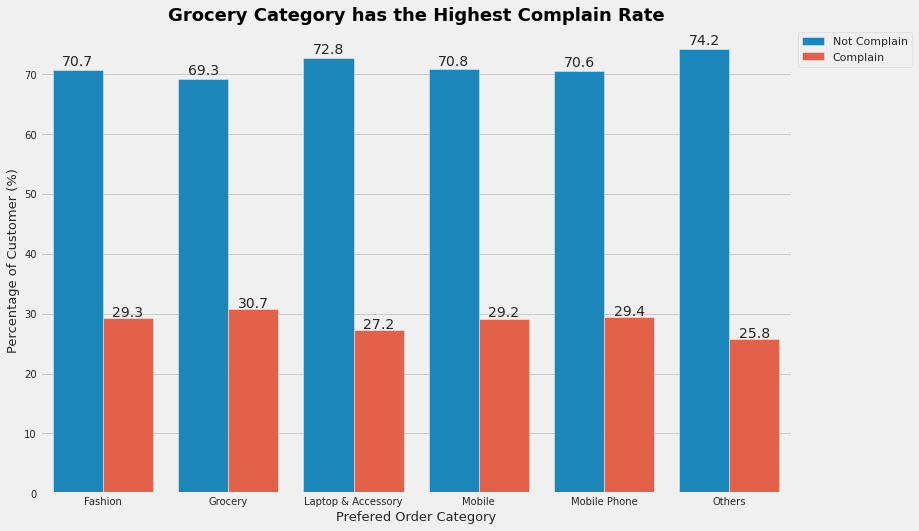

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=group_by_complain3, x='PreferedOrderCat', y='Ratio', hue='Complain')
plt.title('Grocery Category has the Highest Complain Rate', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

### 3. NumberOfAddress

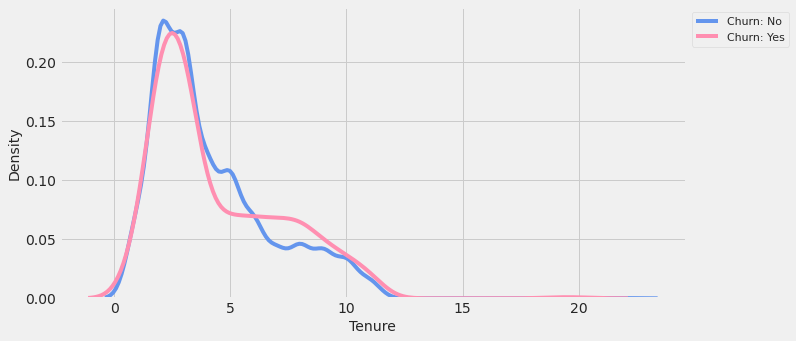

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['NumberOfAddress'].dropna(), color= 'cornflowerblue', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['NumberOfAddress'].dropna(), color= '#FF8FB1', label= 'Churn: Yes', ax=ax)

#ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


#ax.annotate('high distribution of users \nthat churn (short tenure), \nvice versa', 
 #           xy=(2, 0.2), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
   #        ha='center');

### 4. DaySinceLastOrder

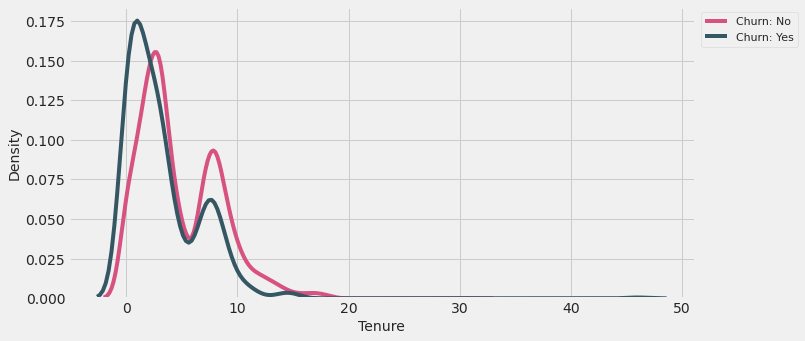

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['DaySinceLastOrder'].dropna(), color= '#D75281', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['DaySinceLastOrder'].dropna(), color= '#355764', label= 'Churn: Yes', ax=ax)

#ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)

In [ ]:
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4674,54675,1,1.0,Computer,1,10.0,Debit Card,Male,4.0,4,Mobile Phone,5,Single,3,1,12.0,6.0,10.0,8.0,158.48
3174,53175,0,5.0,Mobile Phone,3,13.0,Credit Card,Male,4.0,3,Laptop & Accessory,2,Married,6,0,23.0,4.0,6.0,8.0,179.60
1595,51596,1,0.0,Computer,1,16.0,Credit Card,Male,3.0,3,Fashion,3,Married,7,0,11.0,0.0,1.0,0.0,200.48
2614,52615,0,16.0,Phone,2,8.0,Debit Card,Male,3.0,3,Mobile,1,Single,1,0,13.0,1.0,1.0,8.0,135.39
5088,55089,1,8.0,Mobile Phone,1,22.0,Credit Card,Female,4.0,4,Fashion,1,Married,3,0,12.0,1.0,2.0,6.0,204.78
106,50107,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,NaN,0.0,11.0,15.0,292.32
5306,55307,0,8.0,Computer,1,17.0,Debit Card,Male,3.0,2,Laptop & Accessory,1,Married,3,0,14.0,4.0,8.0,3.0,172.24
4955,54956,0,11.0,Mobile Phone,3,17.0,Debit Card,Female,3.0,5,Laptop & Accessory,1,Married,4,1,15.0,2.0,2.0,1.0,191.94
1610,51611,0,2.0,Mobile Phone,3,8.0,Credit Card,Male,3.0,4,Laptop & Accessory,4,Married,3,0,19.0,1.0,1.0,0.0,166.44
4876,54877,0,15.0,Computer,1,16.0,Credit Card,Male,4.0,4,Others,3,Married,4,0,NaN,1.0,2.0,12.0,319.19
